<a href="https://colab.research.google.com/github/kamuma03/Data-Science-Project/blob/main/Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Explorotary Data Analysis of the Dataset



In [ ]:
# Import of all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Import of Dataset

Import of the datasets into Panda dataframe

Initial modifications to add an ID and use it instead of the Time 



In [ ]:
# Import of the train and test datasets into the Panda dataframe

cc_test_df = pd.read_csv("./DATA/creditcard_test.csv")
cc_train_df = pd.read_csv("./DATA/creditcard_train.csv")

cc_test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,71852.0,-0.584007,0.880079,1.320090,0.001509,0.292260,-0.990634,1.120755,-0.166826,-0.501695,...,0.167209,0.361133,-0.125141,0.375231,0.029598,-0.559438,0.102098,0.144502,42.81,0
1,48336.0,1.326714,-0.823441,-0.127404,-0.979830,-0.625116,-0.104941,-0.636415,0.050208,-0.785860,...,0.109578,-0.011447,-0.212676,-0.859332,0.507870,-0.199817,-0.021529,0.003230,75.00,0
2,166298.0,2.097691,-0.076097,-1.743719,-0.011746,0.597501,-0.332470,0.130716,-0.174237,0.383371,...,0.233496,0.825427,-0.143247,-1.115397,0.374189,-0.056085,-0.020643,-0.079921,2.29,0
3,40650.0,-1.593912,2.215525,0.210067,-0.236255,-0.002224,-0.058601,-0.392776,-2.005520,-0.306309,...,1.995801,-1.554302,0.261539,-0.531345,0.124584,0.146124,0.346683,0.104860,8.99,0
4,121428.0,1.863194,0.265005,-0.261564,3.853830,0.220877,0.773558,-0.296455,0.207090,-0.487512,...,0.118870,0.611417,0.034731,-0.387779,0.103574,0.140670,-0.003506,-0.061238,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,116793.0,-0.753070,1.600625,-1.694466,-1.448546,1.130943,-0.976420,1.167232,0.201294,-0.245013,...,0.202703,0.725051,-0.303092,-1.016408,-0.107503,0.146474,0.469657,0.304103,0.75,0
85439,57942.0,-0.539994,0.515511,2.029197,0.514863,-0.043655,-0.275000,0.851781,-0.059080,0.319422,...,0.059047,0.441880,-0.048056,0.574042,-0.252453,-0.545212,-0.007875,-0.067811,40.00,0
85440,53165.0,-1.833594,-1.015652,1.217378,-1.464593,-0.448623,-0.955303,-0.496368,0.481275,-1.151529,...,0.363656,0.279139,0.166895,-0.118669,-0.005576,-0.438610,0.209083,-0.049870,140.00,0
85441,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,...,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0


In [ ]:
# Functiona to create a list to be used as ID for the data frame 
def id_create(df):
    id = []
    for i in range(df.shape[0]):
        id.append(i+1)
    return id

# For the test data frame created an ID list and added to the data frame 
id_test = id_create(cc_test_df)
cc_test_df["Id"] = id_test
cc_test_df.set_index("Id", inplace=True)

# For the train data frame created an ID list and added to the data frame 
id_train = id_create(cc_train_df)
cc_train_df["Id"] = id_train
cc_train_df.set_index("Id", inplace=True)



## Check the missing value

The dataframe information and description along with the missing label plots shows that there isn't any missing or NA value


In [ ]:
print("Dataframe information of the train dataset")
print(cc_train_df.info())
print()
print("Dataframe information of the test dataset")
print(cc_test_df.info())


Dataframe information of the train dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 1 to 199364
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20  

<AxesSubplot:>

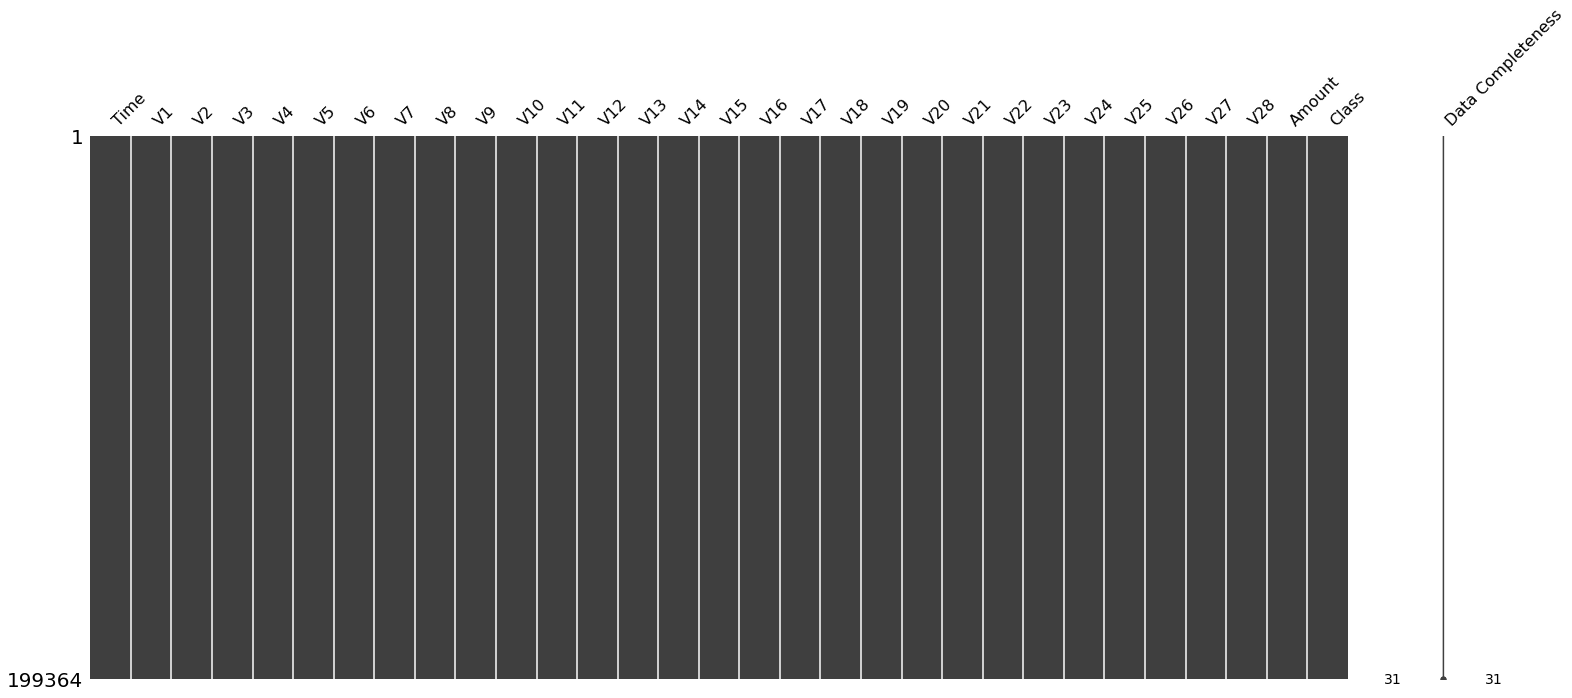

In [ ]:
# Missing label plot for the train dataset
msno.matrix(cc_train_df, labels=True)

<AxesSubplot:>

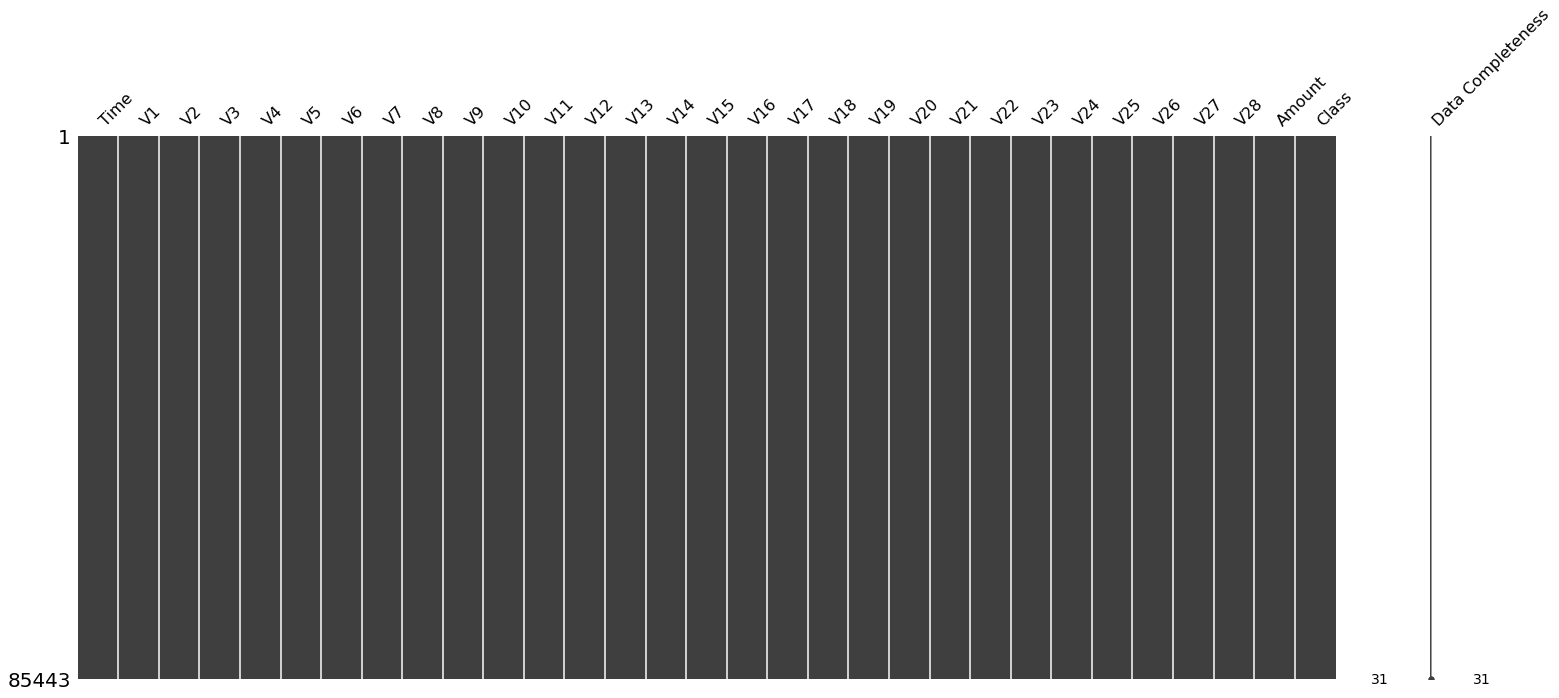

In [ ]:
# Missing label plot for the test dataset
msno.matrix(cc_test_df, labels=True)

In [ ]:
print("Dataframe description of the train dataset")
print(cc_train_df.describe())
print()
print("Dataframe description of the test dataset")
print(cc_test_df.describe())


Dataframe description of the train dataset
                Time             V1             V2             V3  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean    94806.201064       0.004189       0.000392      -0.002316   
std     47511.693849       1.954728       1.638375       1.519695   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54206.250000      -0.918115      -0.599185      -0.891976   
50%     84650.000000       0.023565       0.064251       0.176980   
75%    139350.250000       1.317063       0.801119       1.025002   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean        0.000110      -0.003293       0.003792      -0.000129   
std         1.416631       1.388592       1.336094       1.251271   
min        -5.683171    -113.743307     -26.160506     -43.

## Duplicate values




In [ ]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())


Number of dupplicate in the training set  585
Number of dupplicate in the test set  131


In [ ]:
# Dropping the duplicate and keeping the first
cc_train_df.drop_duplicates(keep='first', inplace=True)

cc_test_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())

Number of dupplicate in the training set  0
Number of dupplicate in the test set  0


## Data type

The Class column in data frame is of type float64
It's value can be only 0 o 1, so this will be converted to the category type

In [ ]:
# Conversion to a category type
cc_train_df["Class"] = cc_train_df["Class"].astype("category")
cc_train_df["Class"].describe()

count     198779
unique         2
top            0
freq      198424
Name: Class, dtype: int64

In [ ]:
# Conversion to a category type
cc_test_df["Class"] = cc_test_df["Class"].astype("category")
cc_test_df["Class"].describe()

count     85312
unique        2
top           0
freq      85187
Name: Class, dtype: int64

## Datset Corelation

Exploring the dataset correlation


In [ ]:
# list of all the columns minus the "Class"
columns = cc_test_df.columns.tolist()
columns_to_remove = ["Class"]

## Remove a list from another list
columns = [var for var in columns if var not in columns_to_remove]
columns

In [ ]:
# Tried to run the below code to get the picture for all the features but it wouldn't show all the picture, tried VSCode and Jupyter notebook
# So i will plot the each of the feature separately
'''
for i, cat in enumerate(columns):
  fig = px.scatter(cc_train_df, x=cat, y="Class")
  fig.show()
'''

In [ ]:
def plotting(x, y):
    title = "Training set " + x + " vs " + y
    fig = px.scatter(cc_train_df, x=x, y=y, title=title)
    fig.show()

    title = "Test set " + x + " vs " + y
    fig = px.scatter(cc_test_df, x=x, y=y, title=title)
    fig.show()

In [ ]:
# Plot the data from the test data set

rows = (len(columns) // 2)
cols = 2
subplot_titles = tuple(var + " vs Fraud detection" for var in columns)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

for i, cat in enumerate(columns):
    row = (i // cols) + 1
    col = (i % cols) + 1
    
    fig.add_trace(go.Scatter(
        x=cc_test_df[cat], y=cc_test_df["Class"], mode="markers"
    ), row=row, col=col)
    
    
    
fig.update_layout(height=4000, title="Scatter plots of feature vs Fraud detection", showlegend=False)
fig.show()